# 02_EDA — Exploratory Data Analysis
**Project:** Real Estate Investment Advisor  
**File:** `data/processed/processed_data.csv`  
**Outputs:** charts saved to `src/eda/plots/`  



In [31]:
# CELL A — Load RAW dataset for EDA instead of processed data
import pandas as pd

RAW_PATH = "data/raw/india_housing_prices.csv"

try:
    df_raw = pd.read_csv(RAW_PATH)
    print("Loaded RAW EDA dataset:", RAW_PATH)
    print("Shape:", df_raw.shape)
    display(df_raw.head(10))
except Exception as e:
    print("[ERROR] Could not load RAW dataset:", e)


Loaded RAW EDA dataset: data/raw/india_housing_prices.csv
Shape: (250000, 23)


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
5,6,West Bengal,Durgapur,Locality_246,Apartment,4,3500,135.28,0.04,2020,...,5,7,7,Low,Yes,Yes,"Playground, Clubhouse",West,Broker,Ready_to_Move
6,7,Tamil Nadu,Coimbatore,Locality_254,Independent House,3,4826,318.12,0.07,2016,...,9,3,6,High,No,Yes,"Clubhouse, Garden, Playground",North,Builder,Under_Construction
7,8,Chhattisgarh,Bilaspur,Locality_490,Independent House,5,4252,141.39,0.03,2021,...,4,10,10,High,Yes,Yes,"Gym, Pool, Clubhouse, Playground",North,Builder,Under_Construction
8,9,Delhi,New Delhi,Locality_232,Villa,4,2678,189.16,0.07,2003,...,22,7,5,Low,No,Yes,"Garden, Clubhouse, Playground",South,Broker,Under_Construction
9,10,Jharkhand,Ranchi,Locality_122,Villa,2,1393,187.42,0.13,2011,...,14,3,3,High,Yes,No,"Clubhouse, Playground, Garden, Gym",East,Owner,Ready_to_Move


[SAVED] src\eda\plots\q1_price_distribution_raw.png


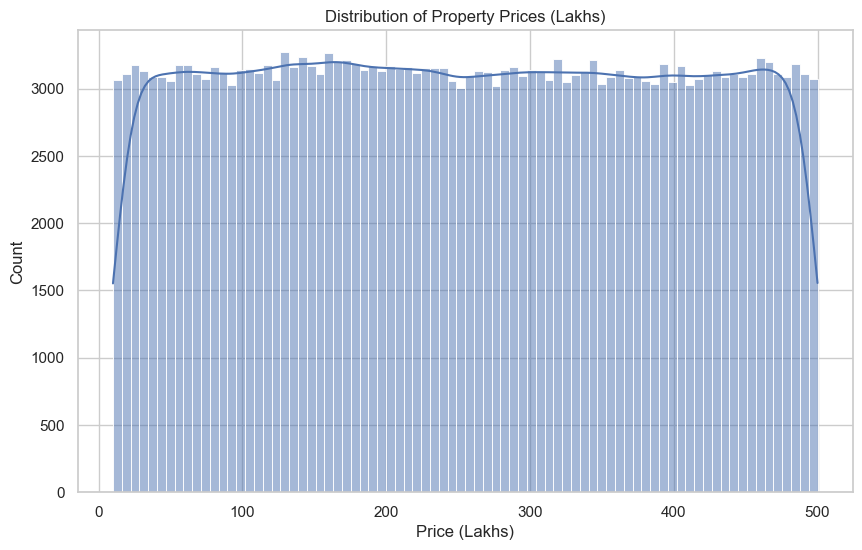

In [32]:
# Q1 — Distribution of RAW Property Prices
import matplotlib.pyplot as plt
import seaborn as sns

try:
    fig, ax = plt.subplots(figsize=(10,6))
    sns.histplot(df_raw["Price_in_Lakhs"], bins=80, kde=True, ax=ax)
    ax.set_title("Distribution of Property Prices (Lakhs)")
    ax.set_xlabel("Price (Lakhs)")
    ax.set_ylabel("Count")
    save_plot(fig, "q1_price_distribution_raw.png")
    plt.show()
except Exception as e:
    print("[ERROR] Q1 failed:", e)


[SAVED] src\eda\plots\q2_size_distribution_raw.png


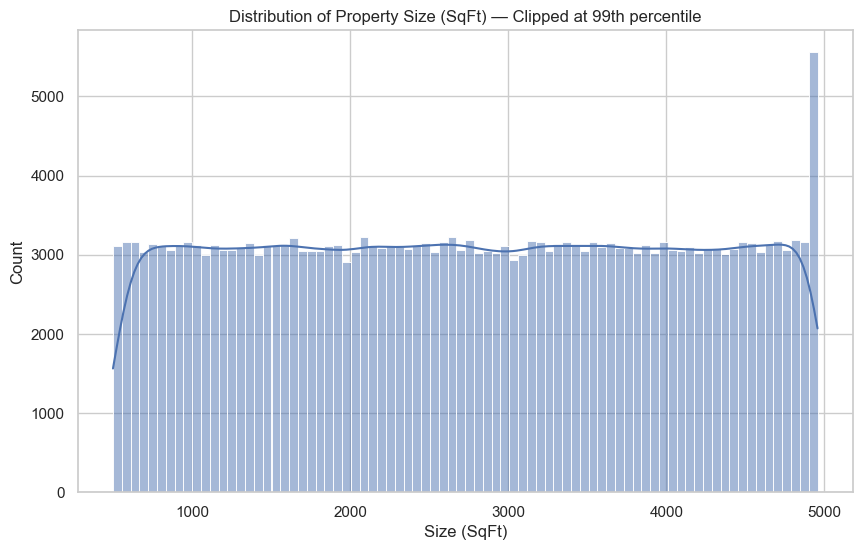

In [33]:
# Q2 — Distribution of RAW Property Sizes
try:
    fig, ax = plt.subplots(figsize=(10,6))

    sns.histplot(
        df_raw["Size_in_SqFt"].clip(upper=df_raw["Size_in_SqFt"].quantile(0.99)),
        bins=80,
        kde=True,
        ax=ax
    )

    ax.set_title("Distribution of Property Size (SqFt) — Clipped at 99th percentile")
    ax.set_xlabel("Size (SqFt)")
    ax.set_ylabel("Count")
    
    save_plot(fig, "q2_size_distribution_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q2 failed:", e)


[SAVED] src\eda\plots\q3_pps_by_property_type_raw.png


C:\Users\stalw\AppData\Local\Temp\ipykernel_20156\339369519.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


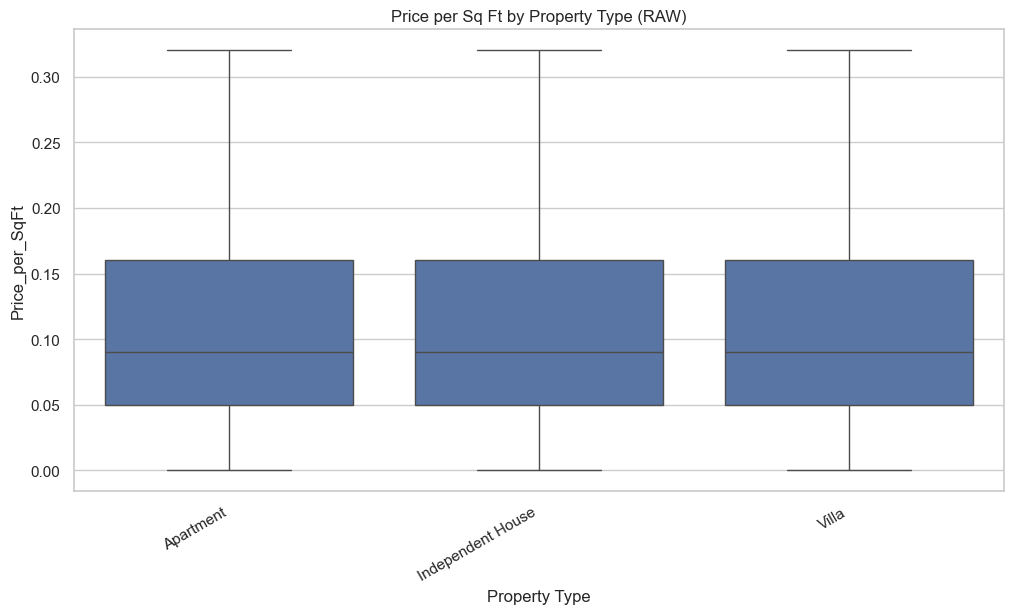

In [34]:
# Q3 — Price per Sq Ft by Property Type (RAW dataset)
try:
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.boxplot(
        data=df_raw,
        x="Property_Type",
        y="Price_per_SqFt",
        showfliers=False,
        ax=ax
    )

    ax.set_title("Price per Sq Ft by Property Type (RAW)")
    ax.set_xlabel("Property Type")
    ax.set_ylabel("Price_per_SqFt")

    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

    save_plot(fig, "q3_pps_by_property_type_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q3 (RAW) failed:", e)


[SAVED] src\eda\plots\q4_size_vs_price_raw.png


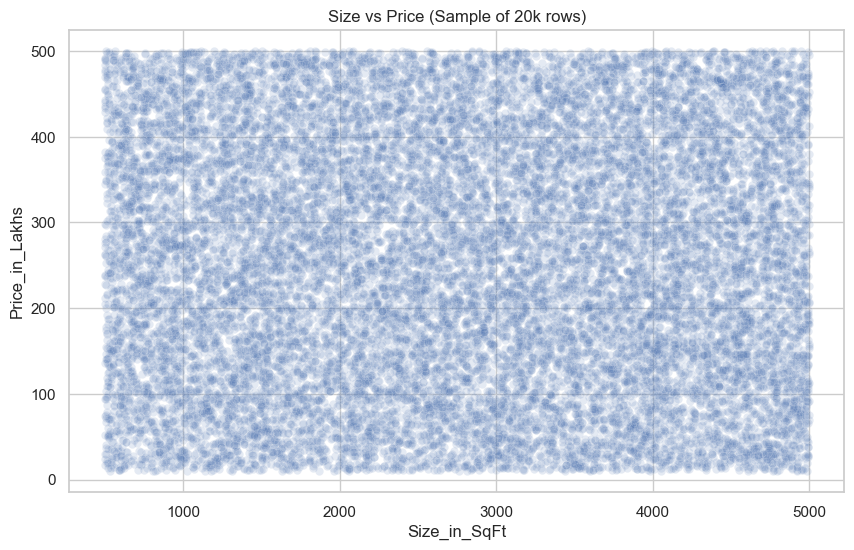

In [35]:
# Q4 — Relationship between Size_in_SqFt and Price_in_Lakhs (RAW)
try:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Sampling to reduce rendering time on 250k rows
    sample_df = df_raw.sample(n=min(20000, len(df_raw)), random_state=42)

    sns.scatterplot(
        data=sample_df,
        x="Size_in_SqFt",
        y="Price_in_Lakhs",
        alpha=0.15,
        ax=ax
    )

    ax.set_title("Size vs Price (Sample of 20k rows)")
    ax.set_xlabel("Size_in_SqFt")
    ax.set_ylabel("Price_in_Lakhs")

    save_plot(fig, "q4_size_vs_price_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q4 failed:", e)


RAW Outliers (|z| > 3):
 - Size_in_SqFt outliers: 0
 - Price_per_SqFt outliers: 6155
[SAVED] src\eda\plots\q5_size_boxplot_raw.png


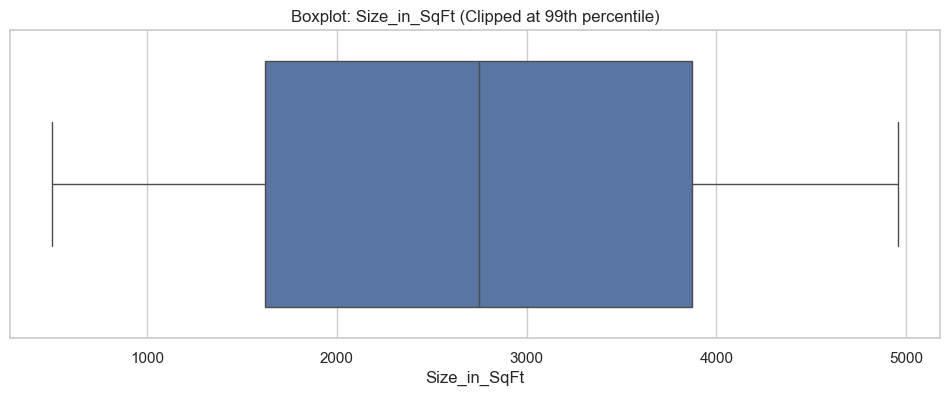

[SAVED] src\eda\plots\q5_pps_boxplot_raw.png


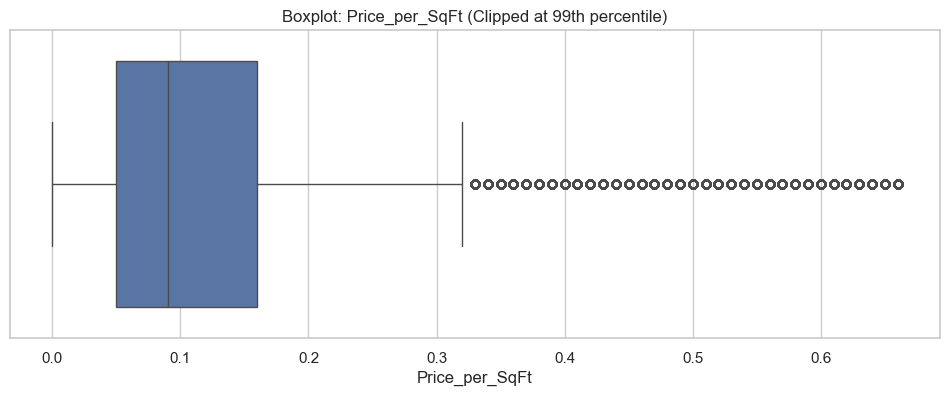

In [36]:
# Q5 — Outliers in Price_per_SqFt and Size_in_SqFt (RAW)
try:
    # Calculate Z-scores
    df_raw["size_z"] = (df_raw["Size_in_SqFt"] - df_raw["Size_in_SqFt"].mean()) / df_raw["Size_in_SqFt"].std()
    df_raw["pps_z"] = (df_raw["Price_per_SqFt"] - df_raw["Price_per_SqFt"].mean()) / df_raw["Price_per_SqFt"].std()

    # Outliers (|z| > 3)
    size_outliers = df_raw[df_raw["size_z"].abs() > 3]
    pps_outliers = df_raw[df_raw["pps_z"].abs() > 3]

    print("RAW Outliers (|z| > 3):")
    print(f" - Size_in_SqFt outliers: {len(size_outliers)}")
    print(f" - Price_per_SqFt outliers: {len(pps_outliers)}")

    # Boxplot for Size (clipped)
    fig1, ax1 = plt.subplots(figsize=(12, 4))
    sns.boxplot(x=df_raw["Size_in_SqFt"].clip(upper=df_raw["Size_in_SqFt"].quantile(0.99)), ax=ax1)
    ax1.set_title("Boxplot: Size_in_SqFt (Clipped at 99th percentile)")
    save_plot(fig1, "q5_size_boxplot_raw.png")
    plt.show()

    # Boxplot for PPSQFT (clipped)
    fig2, ax2 = plt.subplots(figsize=(12, 4))
    sns.boxplot(x=df_raw["Price_per_SqFt"].clip(upper=df_raw["Price_per_SqFt"].quantile(0.99)), ax=ax2)
    ax2.set_title("Boxplot: Price_per_SqFt (Clipped at 99th percentile)")
    save_plot(fig2, "q5_pps_boxplot_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q5 failed:", e)


[SAVED] src\eda\plots\q6_pps_by_state_raw.png


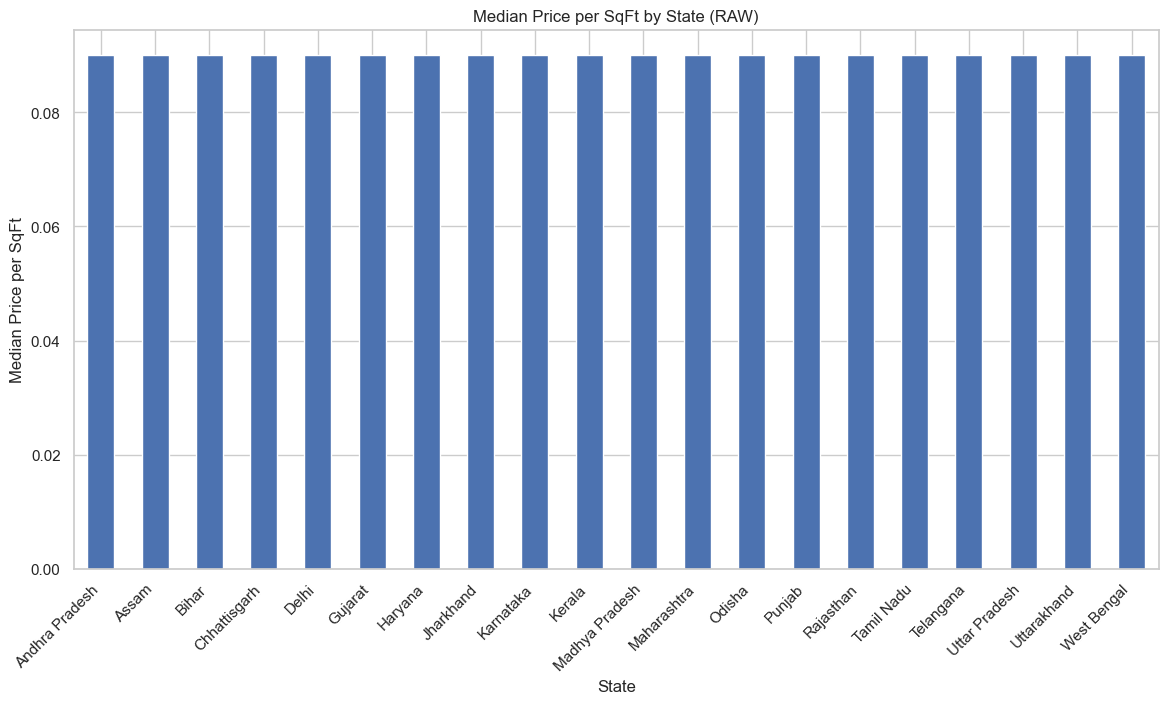

In [37]:
# Q6 — Median Price_per_SqFt by State (RAW dataset)
try:
    state_pps = (
        df_raw.groupby("State")["Price_per_SqFt"]
        .median()
        .sort_values(ascending=False)
    )

    fig, ax = plt.subplots(figsize=(14, 7))
    state_pps.plot(kind="bar", ax=ax)

    ax.set_title("Median Price per SqFt by State (RAW)")
    ax.set_xlabel("State")
    ax.set_ylabel("Median Price per SqFt")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    save_plot(fig, "q6_pps_by_state_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q6 failed:", e)


[SAVED] src\eda\plots\q7_median_price_by_city_raw.png


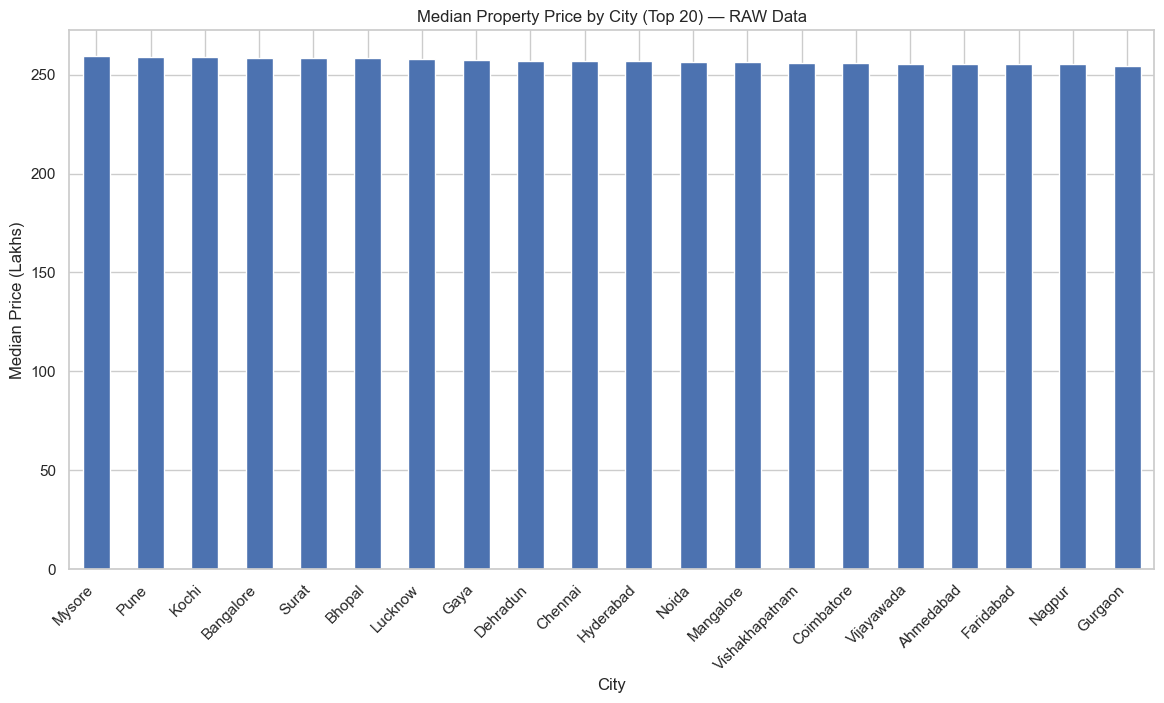

In [38]:
# Q7 — Median Property Price by City (RAW)
try:
    city_price = (
        df_raw.groupby("City")["Price_in_Lakhs"]
        .median()
        .sort_values(ascending=False)
    )

    top_cities = city_price.head(20)

    fig, ax = plt.subplots(figsize=(14, 7))
    top_cities.plot(kind="bar", ax=ax)

    ax.set_title("Median Property Price by City (Top 20) — RAW Data")
    ax.set_xlabel("City")
    ax.set_ylabel("Median Price (Lakhs)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    save_plot(fig, "q7_median_price_by_city_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q7 failed:", e)


[SAVED] src\eda\plots\q8_age_by_locality_raw.png


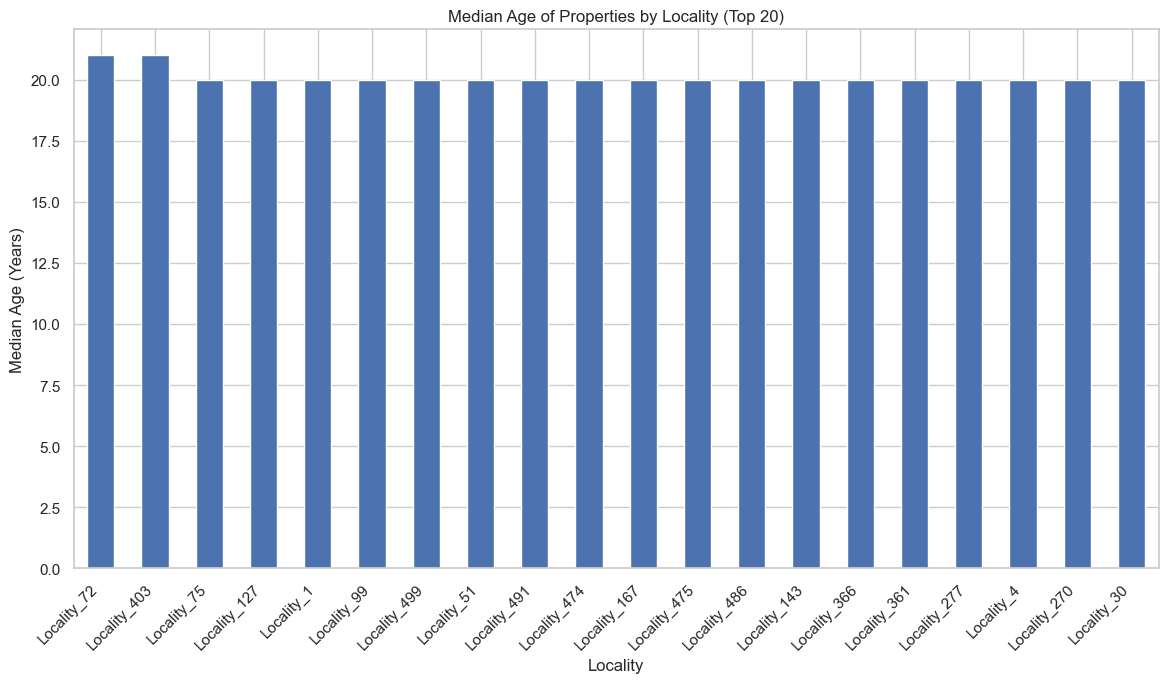

In [39]:
# Q8 — Median Age of Properties by Locality (RAW)
try:
    locality_age = (
        df_raw.groupby("Locality")["Age_of_Property"]
        .median()
        .sort_values(ascending=False)
    )

    top_localities = locality_age.head(20)

    fig, ax = plt.subplots(figsize=(14, 7))
    top_localities.plot(kind="bar", ax=ax)

    ax.set_title("Median Age of Properties by Locality (Top 20)")
    ax.set_xlabel("Locality")
    ax.set_ylabel("Median Age (Years)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    save_plot(fig, "q8_age_by_locality_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q8 failed:", e)


C:\Users\stalw\AppData\Local\Temp\ipykernel_20156\2591051502.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


[SAVED] src\eda\plots\q9_bhk_distribution_by_city_raw.png


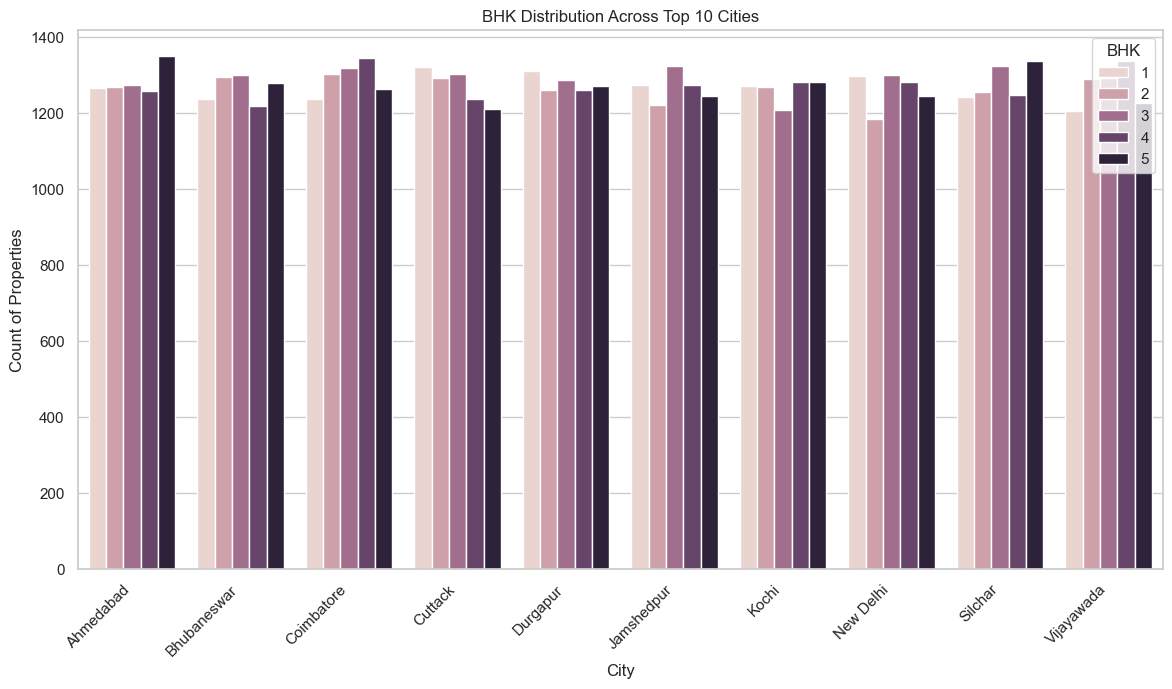

In [40]:
# Q9 — BHK distribution across cities (RAW)
try:
    # Count BHK values per city
    bhk_city = df_raw.groupby(["City", "BHK"]).size().reset_index(name="Count")

    # Take top 10 cities by number of listings
    top_cities = (
        df_raw["City"].value_counts().head(10).index
    )
    bhk_city_top = bhk_city[bhk_city["City"].isin(top_cities)]

    fig, ax = plt.subplots(figsize=(14, 7))

    sns.barplot(
        data=bhk_city_top,
        x="City",
        y="Count",
        hue="BHK",
        ax=ax
    )

    ax.set_title("BHK Distribution Across Top 10 Cities")
    ax.set_xlabel("City")
    ax.set_ylabel("Count of Properties")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    save_plot(fig, "q9_bhk_distribution_by_city_raw.png")
    plt.show()

except Exception as e:
    pr


Top 5 Localities (Highest Median Price): ['Locality_395', 'Locality_366', 'Locality_303', 'Locality_79', 'Locality_203']
[SAVED] src\eda\plots\q10_price_trends_top5_localities_raw.png


C:\Users\stalw\AppData\Local\Temp\ipykernel_20156\3396945902.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


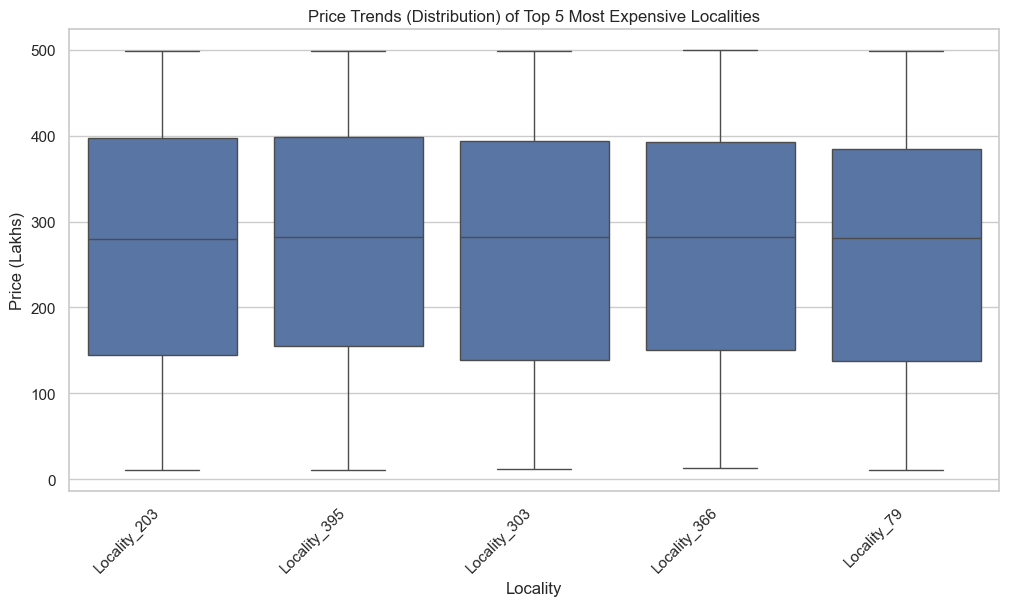

In [41]:
# Q10 — Price trends for the top 5 most expensive localities (RAW)
try:
    # Step 1: get median price per locality
    locality_price = (
        df_raw.groupby("Locality")["Price_in_Lakhs"]
        .median()
        .sort_values(ascending=False)
    )

    top5_localities = locality_price.head(5).index.tolist()
    print("Top 5 Localities (Highest Median Price):", top5_localities)

    df_top5 = df_raw[df_raw["Locality"].isin(top5_localities)]

    # Step 2: violin/box plot for price distribution
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(
        data=df_top5,
        x="Locality",
        y="Price_in_Lakhs",
        showfliers=False,
        ax=ax
    )

    ax.set_title("Price Trends (Distribution) of Top 5 Most Expensive Localities")
    ax.set_xlabel("Locality")
    ax.set_ylabel("Price (Lakhs)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    save_plot(fig, "q10_price_trends_top5_localities_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q10 failed:", e)


Numeric columns: ['ID', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'size_z', 'pps_z']
[SAVED] src\eda\plots\q11_correlation_heatmap_raw.png


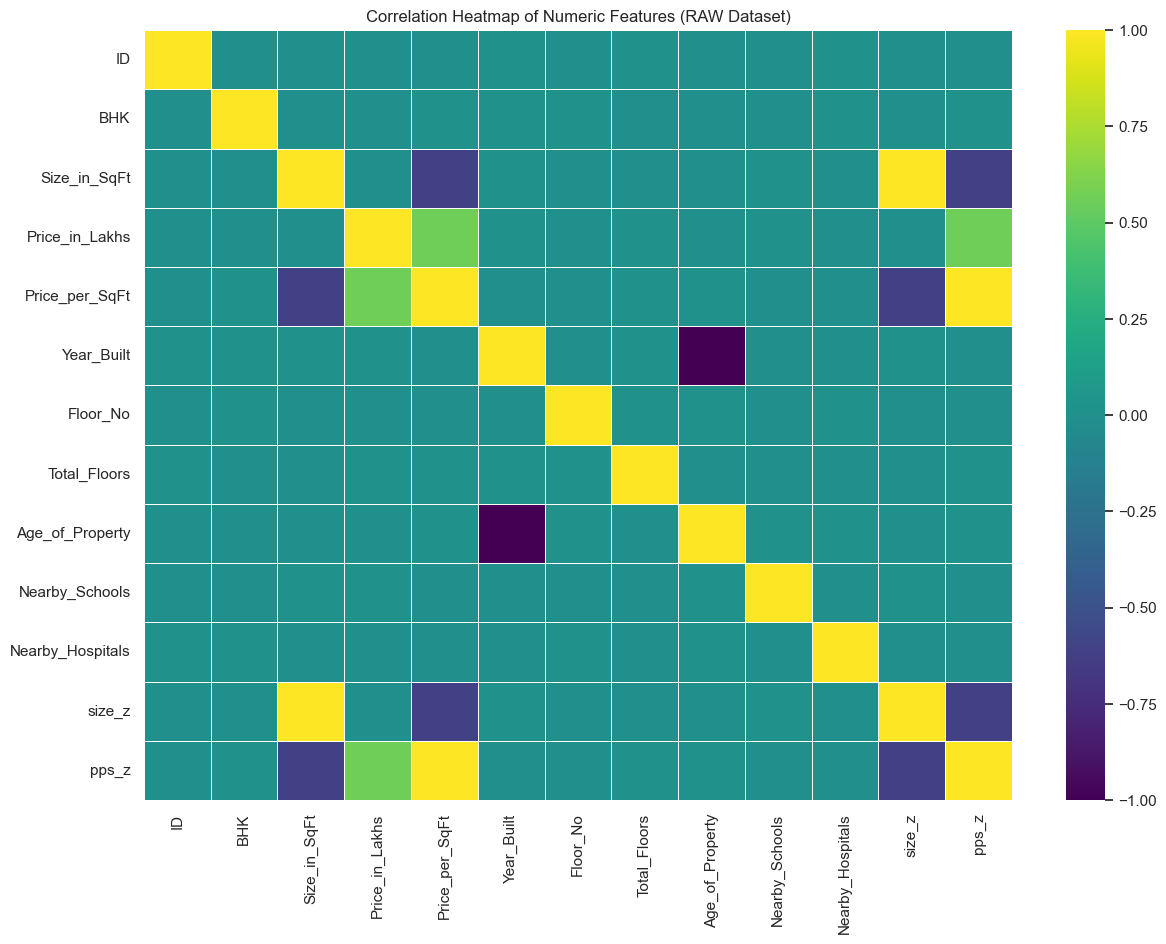

In [42]:
# Q11 — Correlation heatmap of numeric features (RAW)
try:
    # Select only numeric columns
    numeric_df = df_raw.select_dtypes(include=["int64", "float64"])

    print("Numeric columns:", numeric_df.columns.tolist())

    # Compute correlation matrix
    corr_matrix = numeric_df.corr()

    # Plot heatmap
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, ax = plt.subplots(figsize=(14, 10))
    sns.heatmap(
        corr_matrix,
        annot=False,
        cmap="viridis",
        linewidths=0.5,
        ax=ax
    )

    ax.set_title("Correlation Heatmap of Numeric Features (RAW Dataset)")

    save_plot(fig, "q11_correlation_heatmap_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q11 failed:", e)


[SAVED] src\eda\plots\q12_schools_vs_pps_raw.png


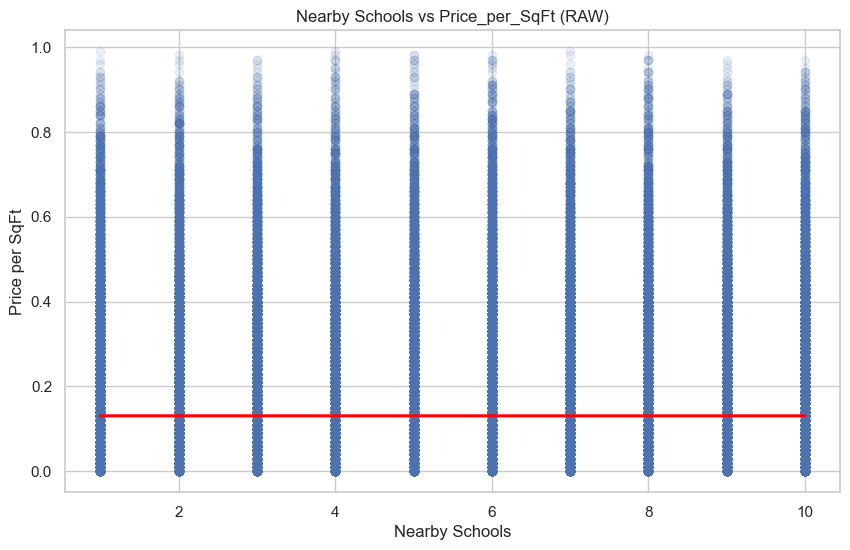

In [43]:
# Q12 — Relationship between Nearby Schools and Price_per_SqFt
try:
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.regplot(
        data=df_raw,
        x="Nearby_Schools",
        y="Price_per_SqFt",
        scatter_kws={"alpha": 0.1},
        line_kws={"color": "red"},
        ax=ax
    )

    ax.set_title("Nearby Schools vs Price_per_SqFt (RAW)")
    ax.set_xlabel("Nearby Schools")
    ax.set_ylabel("Price per SqFt")

    save_plot(fig, "q12_schools_vs_pps_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q12 failed:", e)


[SAVED] src\eda\plots\q13_hospitals_vs_pps_raw.png


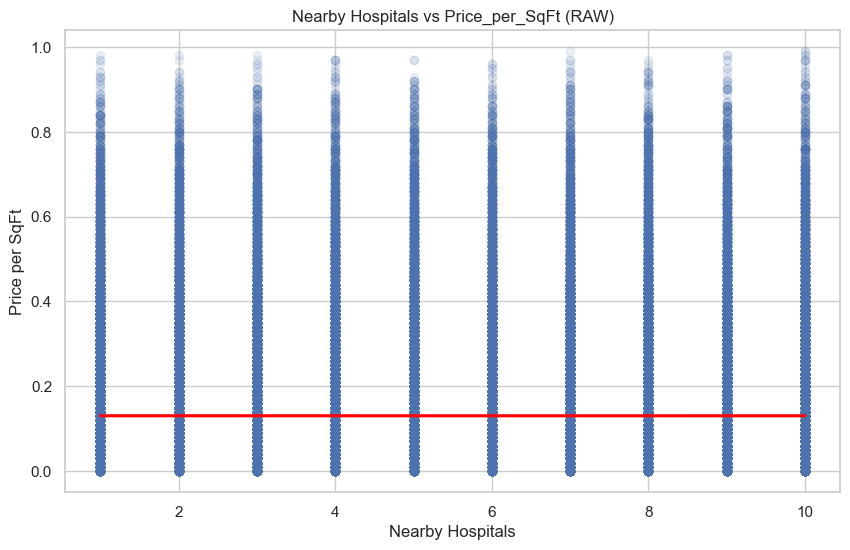

In [44]:
# Q13 — Relationship between Nearby Hospitals and Price_per_SqFt
try:
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.regplot(
        data=df_raw,
        x="Nearby_Hospitals",
        y="Price_per_SqFt",
        scatter_kws={"alpha": 0.1},
        line_kws={"color": "red"},
        ax=ax
    )

    ax.set_title("Nearby Hospitals vs Price_per_SqFt (RAW)")
    ax.set_xlabel("Nearby Hospitals")
    ax.set_ylabel("Price per SqFt")

    save_plot(fig, "q13_hospitals_vs_pps_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q13 failed:", e)


[SAVED] src\eda\plots\q14_price_by_furnished_status_raw.png


C:\Users\stalw\AppData\Local\Temp\ipykernel_20156\3356334950.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


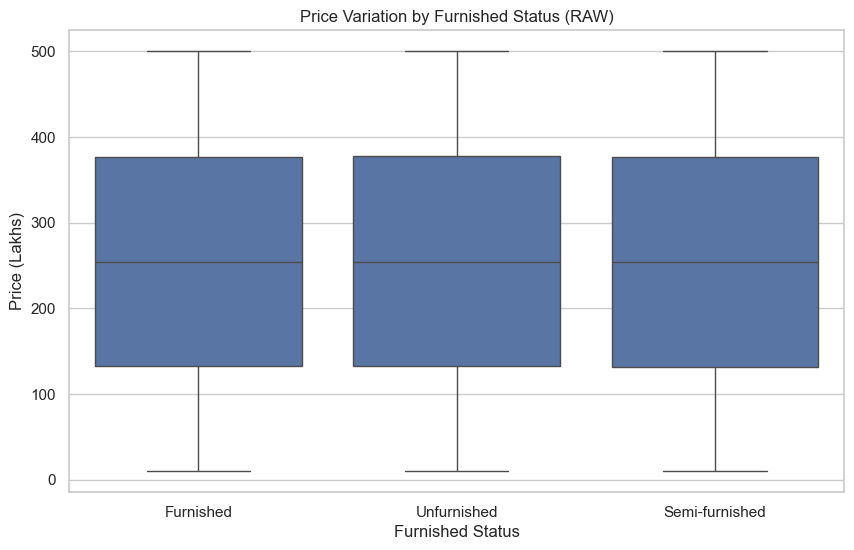

In [45]:
# Q14 — Price variation by Furnished_Status (RAW)
try:
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.boxplot(
        data=df_raw,
        x="Furnished_Status",
        y="Price_in_Lakhs",
        showfliers=False,
        ax=ax
    )

    ax.set_title("Price Variation by Furnished Status (RAW)")
    ax.set_xlabel("Furnished Status")
    ax.set_ylabel("Price (Lakhs)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    save_plot(fig, "q14_price_by_furnished_status_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q14 failed:", e)



[SAVED] src\eda\plots\q15_pps_by_facing_direction_raw.png


C:\Users\stalw\AppData\Local\Temp\ipykernel_20156\3610626127.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


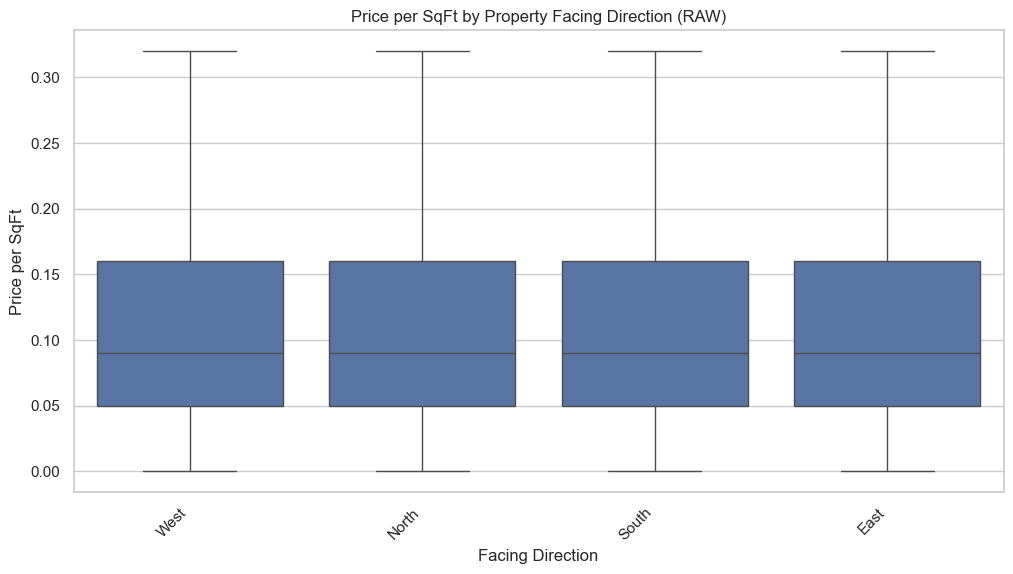

In [47]:
# Q15 — Price_per_SqFt variation by Facing direction (RAW)
try:
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.boxplot(
        data=df_raw,
        x="Facing",
        y="Price_per_SqFt",
        showfliers=False,
        ax=ax
    )

    ax.set_title("Price per SqFt by Property Facing Direction (RAW)")
    ax.set_xlabel("Facing Direction")
    ax.set_ylabel("Price per SqFt")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    save_plot(fig, "q15_pps_by_facing_direction_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q15 failed:", e)


Owner Type Counts:
Owner_Type
Broker     83479
Owner      83268
Builder    83253
Name: count, dtype: int64
[SAVED] src\eda\plots\q16_owner_type_distribution_raw.png


C:\Users\stalw\AppData\Local\Temp\ipykernel_20156\2174175782.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


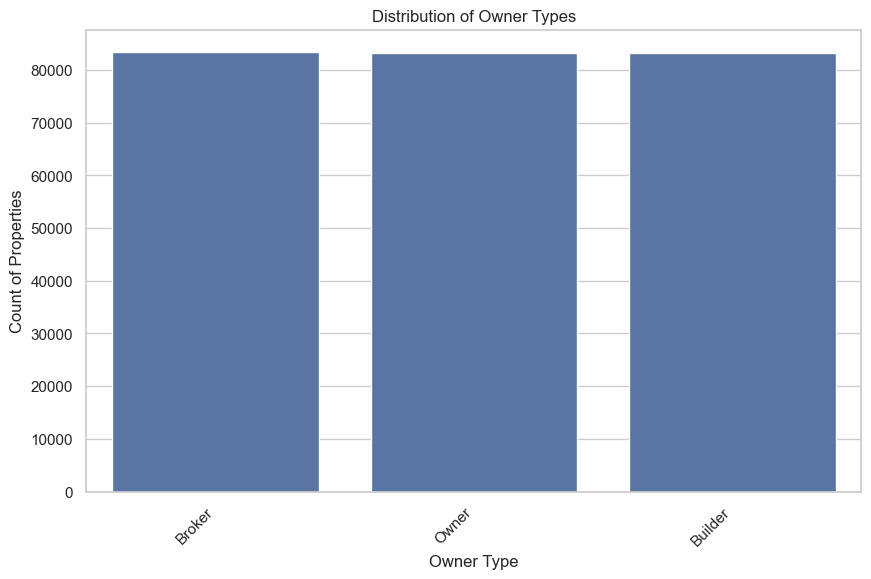

In [46]:
# Q16 — Count of properties by Owner_Type (RAW)
try:
    owner_counts = df_raw["Owner_Type"].value_counts()

    print("Owner Type Counts:")
    print(owner_counts)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(
        x=owner_counts.index,
        y=owner_counts.values,
        ax=ax
    )

    ax.set_title("Distribution of Owner Types")
    ax.set_xlabel("Owner Type")
    ax.set_ylabel("Count of Properties")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    save_plot(fig, "q16_owner_type_distribution_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q16 failed:", e)


Availability Status Counts:
Availability_Status
Under_Construction    125035
Ready_to_Move         124965
Name: count, dtype: int64
[SAVED] src\eda\plots\q17_availability_status_distribution_raw.png


C:\Users\stalw\AppData\Local\Temp\ipykernel_20156\4080309448.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


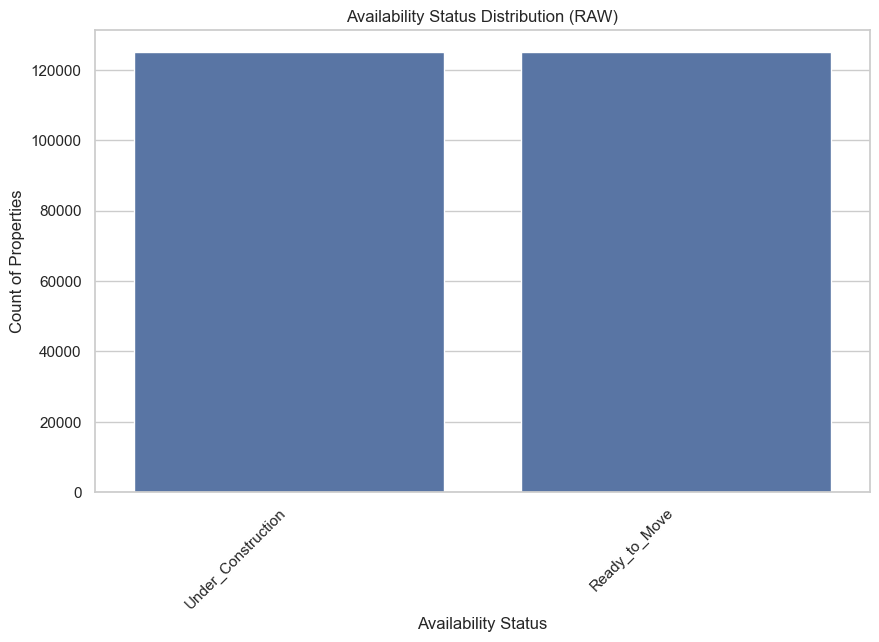

In [48]:
# Q17 — Availability status distribution (RAW)
try:
    availability_counts = df_raw["Availability_Status"].value_counts()

    print("Availability Status Counts:")
    print(availability_counts)

    fig, ax = plt.subplots(figsize=(10, 6))

    sns.barplot(
        x=availability_counts.index,
        y=availability_counts.values,
        ax=ax
    )

    ax.set_title("Availability Status Distribution (RAW)")
    ax.set_xlabel("Availability Status")
    ax.set_ylabel("Count of Properties")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    save_plot(fig, "q17_availability_status_distribution_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q17 failed:", e)


[SAVED] src\eda\plots\q18_parking_vs_pps_raw.png


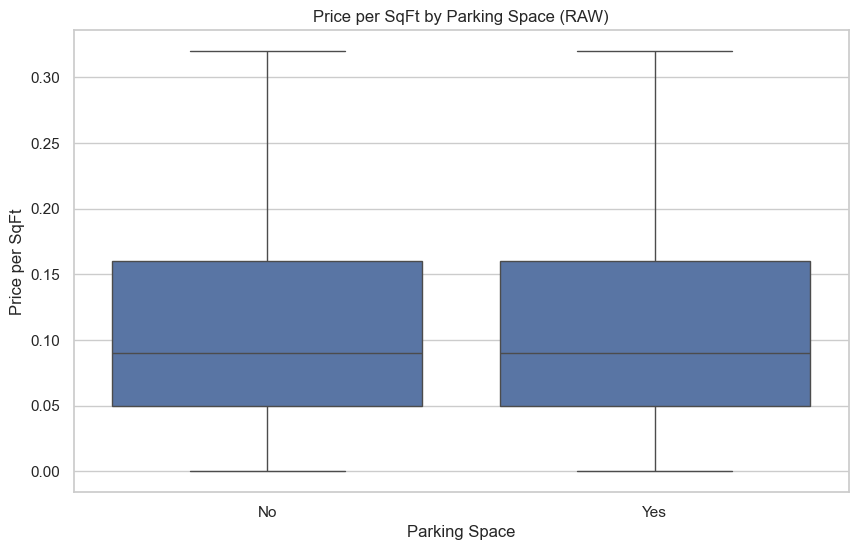


Median Price per SqFt by Parking Space:
Parking_Space
No     0.09
Yes    0.09
Name: Price_per_SqFt, dtype: float64


In [49]:
# Q18 — Does Parking Space affect Price? (RAW)
try:
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.boxplot(
        data=df_raw,
        x="Parking_Space",
        y="Price_per_SqFt",
        showfliers=False,
        ax=ax
    )

    ax.set_title("Price per SqFt by Parking Space (RAW)")
    ax.set_xlabel("Parking Space")
    ax.set_ylabel("Price per SqFt")

    save_plot(fig, "q18_parking_vs_pps_raw.png")
    plt.show()

    # Median prices for each parking count
    median_table = (
        df_raw.groupby("Parking_Space")["Price_per_SqFt"]
        .median()
        .sort_values(ascending=False)
    )

    print("\nMedian Price per SqFt by Parking Space:")
    print(median_table)

except Exception as e:
    print("[ERROR] Q18 failed:", e)


Top Amenities: ['Garden', 'Pool', 'Clubhouse', 'Gym', 'Playground']
[SAVED] src\eda\plots\q19_amenities_vs_pps_raw.png


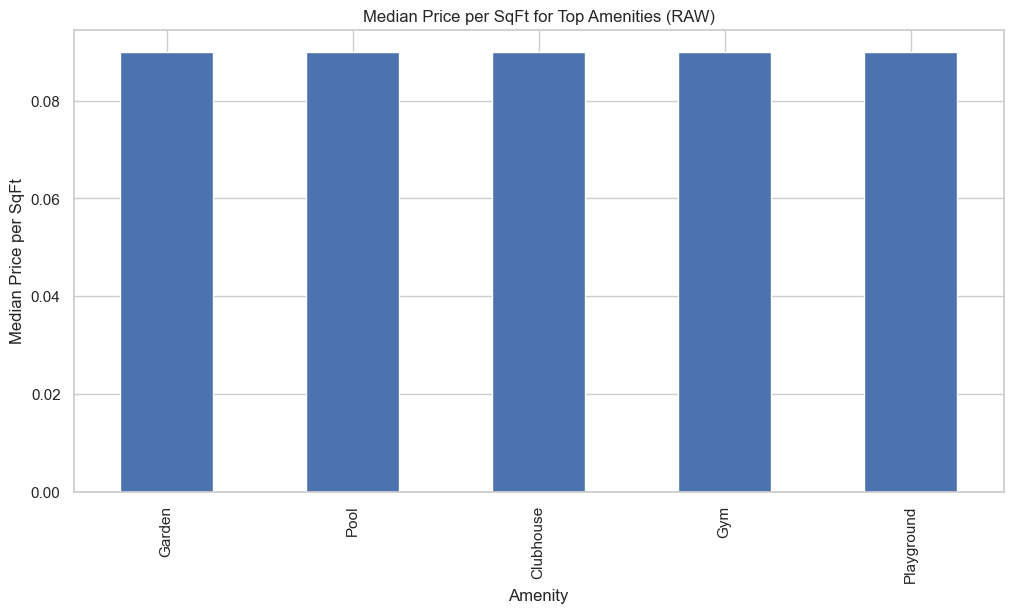

In [51]:
# Q19 — Effect of Amenities on Price_per_SqFt (RAW)
try:
    # Handle missing or empty amenities
    df_raw["Amenities"] = df_raw["Amenities"].fillna("")

    # Split and count amenities
    amen_counts = {}
    for item in df_raw["Amenities"]:
        for amen in str(item).split(","):
            amen = amen.strip()
            if amen:
                amen_counts[amen] = amen_counts.get(amen, 0) + 1

    # Top 10 most common amenities
    top_amenities = sorted(amen_counts, key=amen_counts.get, reverse=True)[:10]
    print("Top Amenities:", top_amenities)

    # Create binary indicator columns
    for amen in top_amenities:
        df_raw[f"amen_{amen}"] = df_raw["Amenities"].str.contains(amen, regex=False)

    # Compute median PPS for each amenity
    amen_medians = {
        amen: df_raw[df_raw[f"amen_{amen}"]]["Price_per_SqFt"].median()
        for amen in top_amenities
    }

    # Convert to Series for easy plotting
    amen_medians_series = pd.Series(amen_medians).sort_values(ascending=False)

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    amen_medians_series.plot(kind="bar", ax=ax)

    ax.set_title("Median Price per SqFt for Top Amenities (RAW)")
    ax.set_xlabel("Amenity")
    ax.set_ylabel("Median Price per SqFt")

    save_plot(fig, "q19_amenities_vs_pps_raw.png")
    plt.show()

except Exception as e:
    print("[ERROR] Q19 failed:", e)


[ERROR] Q20 failed: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)


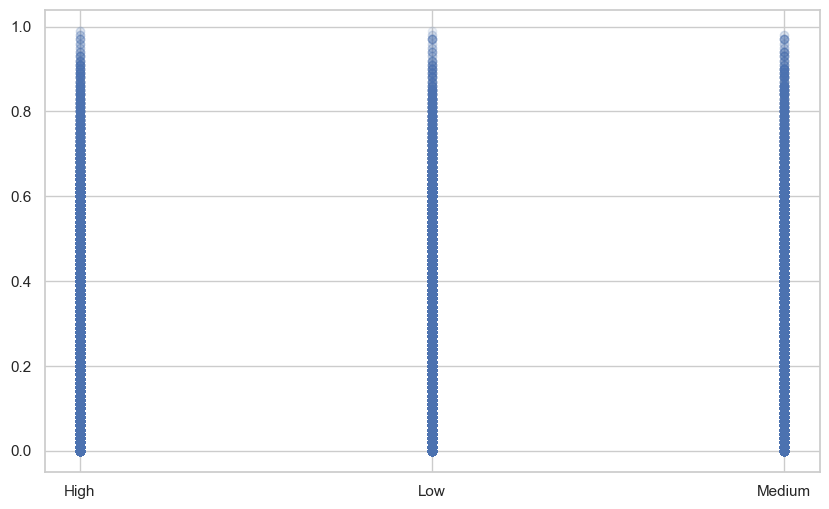

In [52]:
# Q20 — Transport Accessibility vs Price_per_SqFt (RAW)
try:
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.regplot(
        data=df_raw,
        x="Public_Transport_Accessibility",
        y="Price_per_SqFt",
        scatter_kws={"alpha": 0.1},
        line_kws={"color": "red"},
        ax=ax
    )

    ax.set_title("Public Transport Accessibility vs Price_per_SqFt (RAW)")
    ax.set_xlabel("Transport Accessibility Score")
    ax.set_ylabel("Price per SqFt")

    save_plot(fig, "q20_transport_vs_pps_raw.png")
    plt.show()

    # Bonus: median PPS for each score
    median_pt = (
        df_raw.groupby("Public_Transport_Accessibility")["Price_per_SqFt"]
        .median()
        .sort_index()
    )

    print("\nMedian Price_per_SqFt by Transport Accessibility Score:")
    print(median_pt)

except Exception as e:
    print("[ERROR] Q20 failed:", e)
